In [1]:
# This notebook includes exploratory data analysis and visualizations.

In [2]:
import pandas as pd

In [3]:
file_path = 'Data/Cleaned_Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(file_path)

In [4]:
categorical_columns = [
    'Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level',
    'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
    'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity',
    'Sleep_Quality', 'Region'
]

for column in categorical_columns:
    df[column] = df[column].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Employee_ID                        5000 non-null   object  
 1   Age                                5000 non-null   int64   
 2   Gender                             5000 non-null   category
 3   Job_Role                           5000 non-null   category
 4   Industry                           5000 non-null   category
 5   Years_of_Experience                5000 non-null   int64   
 6   Work_Location                      5000 non-null   category
 7   Hours_Worked_Per_Week              5000 non-null   int64   
 8   Number_of_Virtual_Meetings         5000 non-null   int64   
 9   Work_Life_Balance_Rating           5000 non-null   int64   
 10  Stress_Level                       5000 non-null   category
 11  Mental_Health_Condition            5000 non

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

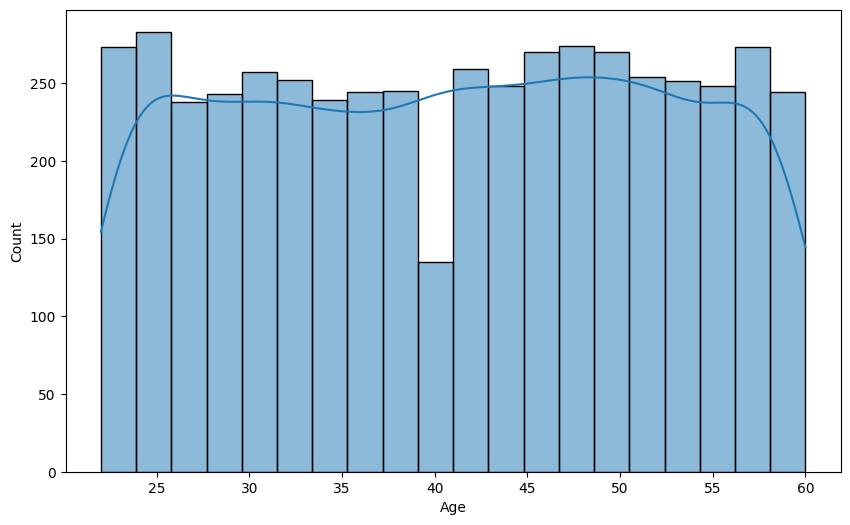

In [7]:
# Age Distribution
plt.figure(figsize = (10, 6))
plt.plot(xlabel = 'Age', ylabel = 'Frequency', title = 'Age Distribution')
sns.histplot(df['Age'], bins = 20, kde = True)
plt.show()

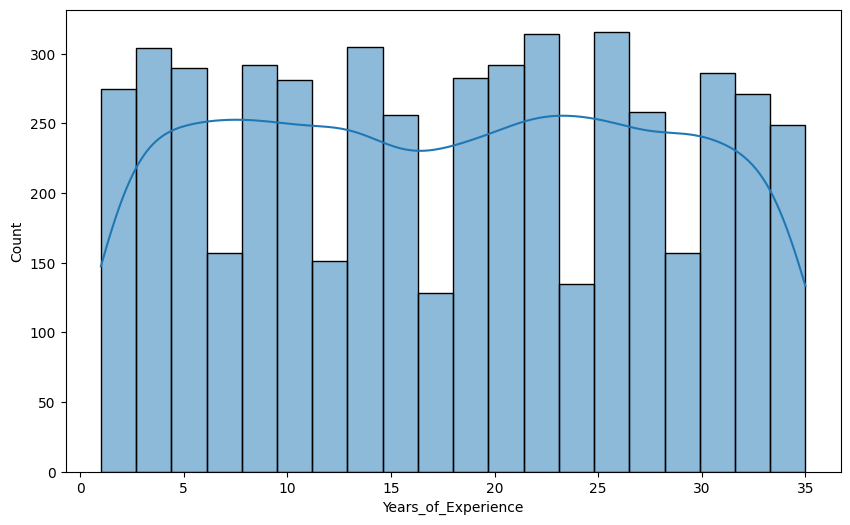

In [8]:
# Years of Experience Distribution
plt.figure(figsize = (10, 6))
plt.plot(xlabel = 'Years of Experience', ylabel = 'Frequency', title = 'Years of Experience Distribution')
sns.histplot(df['Years_of_Experience'], bins = 20, kde = True)
plt.show()

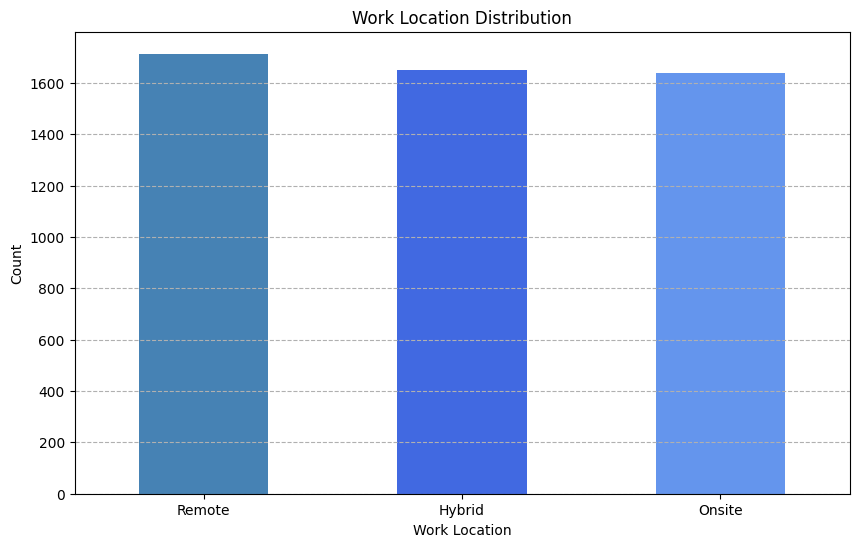

In [9]:
# Work Location Distribution
df['Work_Location'].value_counts().plot(kind = 'bar', color = ['steelblue', 'royalblue', 'cornflowerblue'], ylabel = 'Count', 
                                        xlabel = 'Work Location', title = 'Work Location Distribution', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

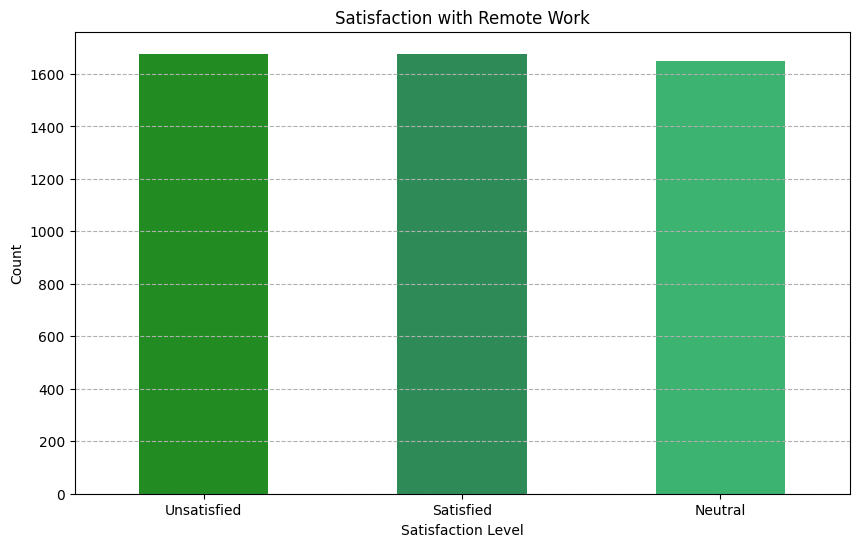

In [10]:
# Satisfaction with Remote Work Distribution
df['Satisfaction_with_Remote_Work'].value_counts().plot(kind = 'bar', color = ['forestgreen', 'seagreen', 'mediumseagreen'], ylabel = 'Count', 
                                        xlabel = 'Satisfaction Level', title = 'Satisfaction with Remote Work', figsize = (10, 6))
plt.grid(axis = 'y', linestyle='--')
plt.xticks(rotation = 0)
plt.show()

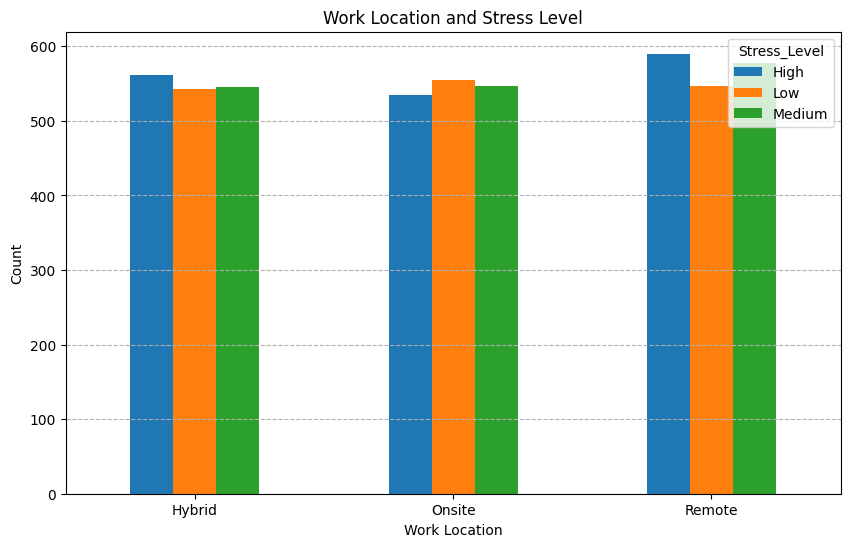

In [11]:
# Work Location and Stress Level
df.groupby(['Work_Location', 'Stress_Level'], observed = False).size().unstack().plot(kind = 'bar', xlabel = 'Work Location', ylabel = 'Count',
                                                                                     title = 'Work Location and Stress Level', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

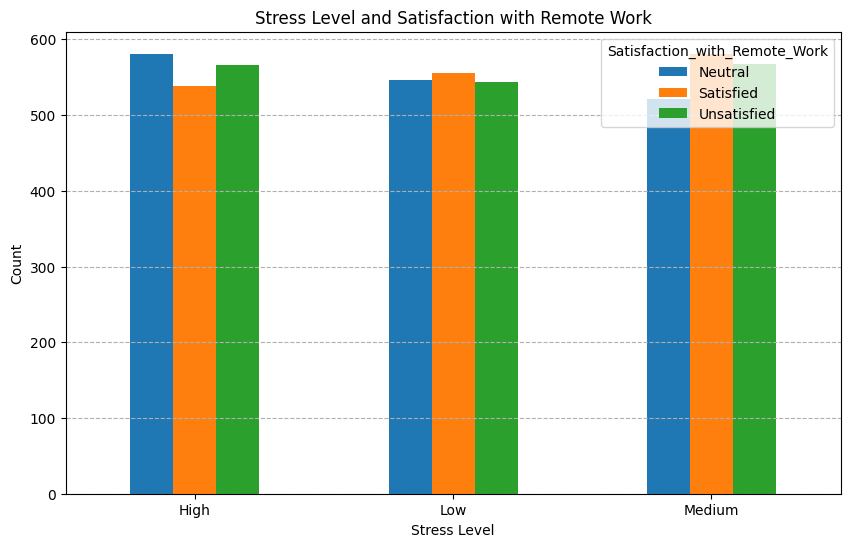

In [12]:
# Stress Level and Satisfaction with Remote Work
df.groupby(['Stress_Level', 'Satisfaction_with_Remote_Work'], observed = False).size().unstack().plot(kind = 'bar', 
            xlabel = 'Stress Level', ylabel = 'Count', title = 'Stress Level and Satisfaction with Remote Work', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

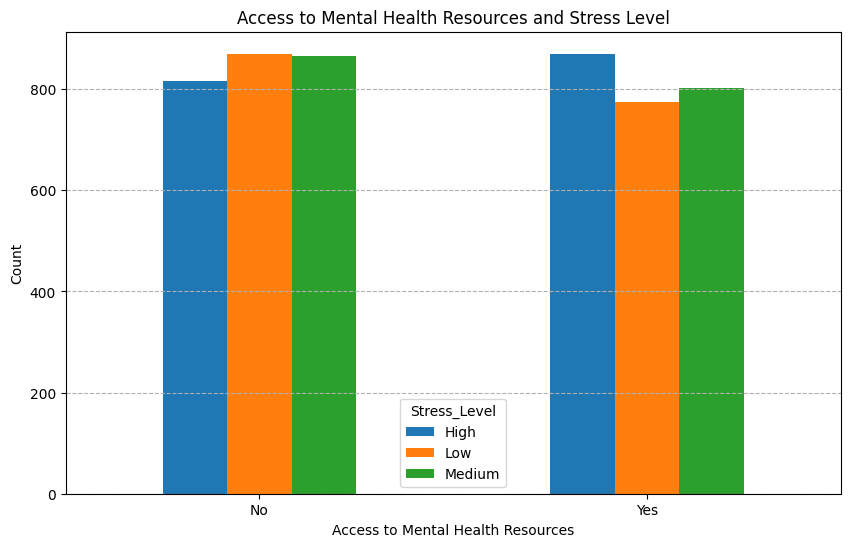

In [13]:
# Access to Mental Health Resources and Stress Level
df.groupby(['Access_to_Mental_Health_Resources', 'Stress_Level'], observed = False).size().unstack().plot(kind = 'bar', 
                                xlabel = 'Access to Mental Health Resources', ylabel = 'Count', 
                                title = 'Access to Mental Health Resources and Stress Level', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

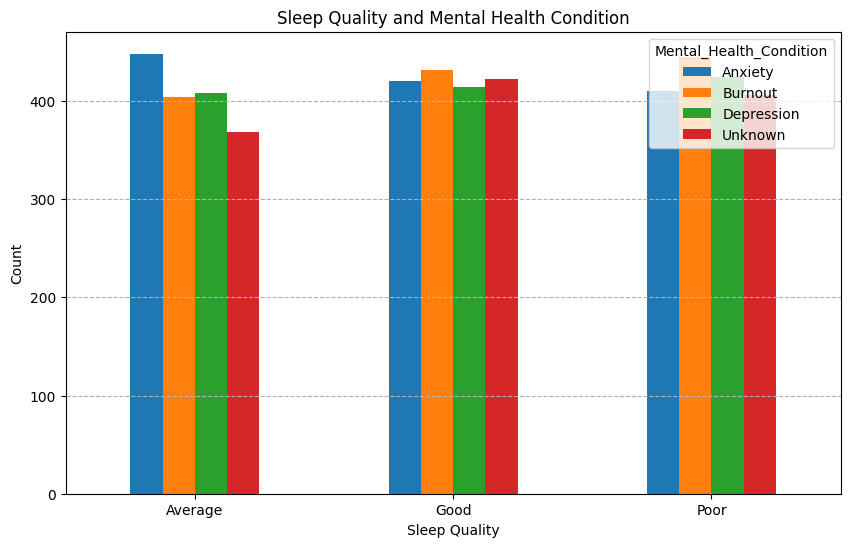

In [14]:
# Sleep Quality and Mental Health Conditions
df.groupby(['Sleep_Quality', 'Mental_Health_Condition'], observed = False).size().unstack().plot(kind = 'bar', 
            xlabel = 'Sleep Quality', ylabel = 'Count', title = 'Sleep Quality and Mental Health Condition', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

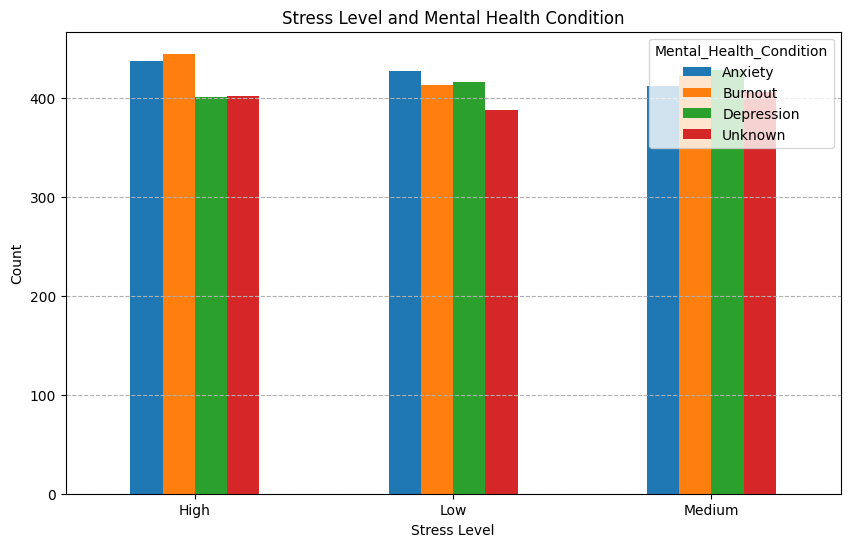

In [15]:
# Stress Level and Mental Health Conditions
df.groupby(['Stress_Level', 'Mental_Health_Condition'], observed = False).size().unstack().plot(kind = 'bar', 
            xlabel = 'Stress Level', ylabel = 'Count', title = 'Stress Level and Mental Health Condition', figsize = (10, 6))
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 0)
plt.show()

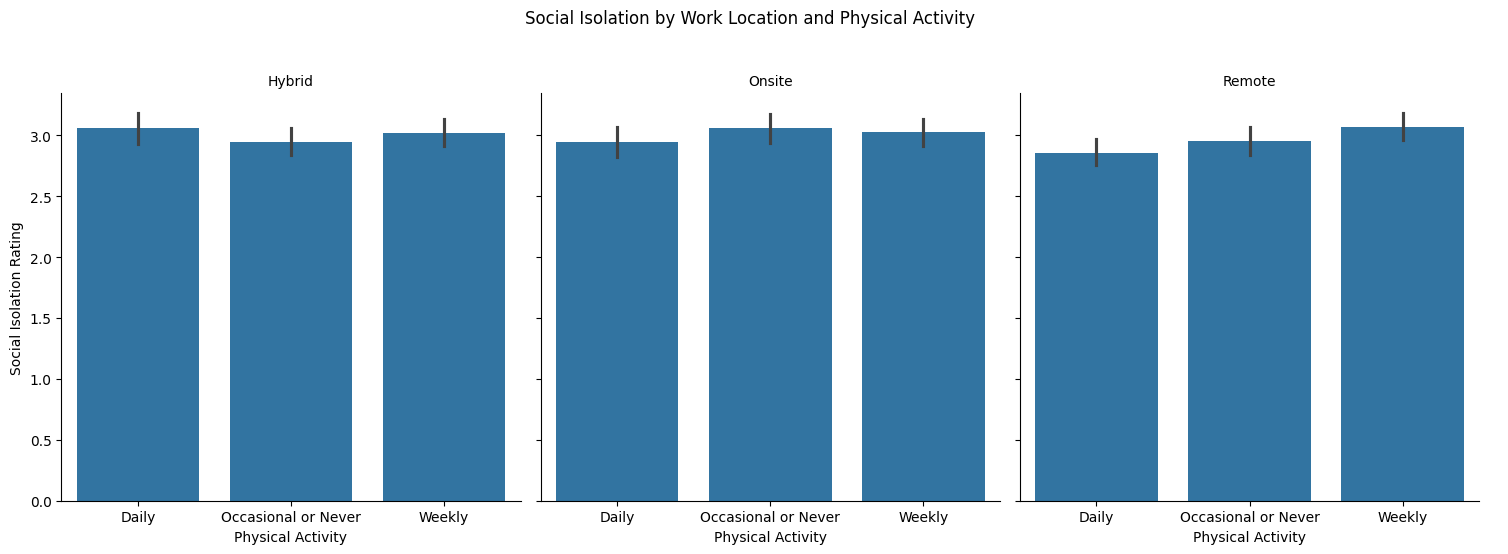

In [16]:
# Work Location, Social Isolation, and Physical Activity
catplt = sns.catplot(x = 'Physical_Activity', y = 'Social_Isolation_Rating', col = 'Work_Location', data = df, kind = 'bar')
catplt.set_titles('{col_name}')
catplt.set_axis_labels('Physical Activity', 'Social Isolation Rating')
catplt.fig.suptitle('Social Isolation by Work Location and Physical Activity', y = 1.1)
plt.show()

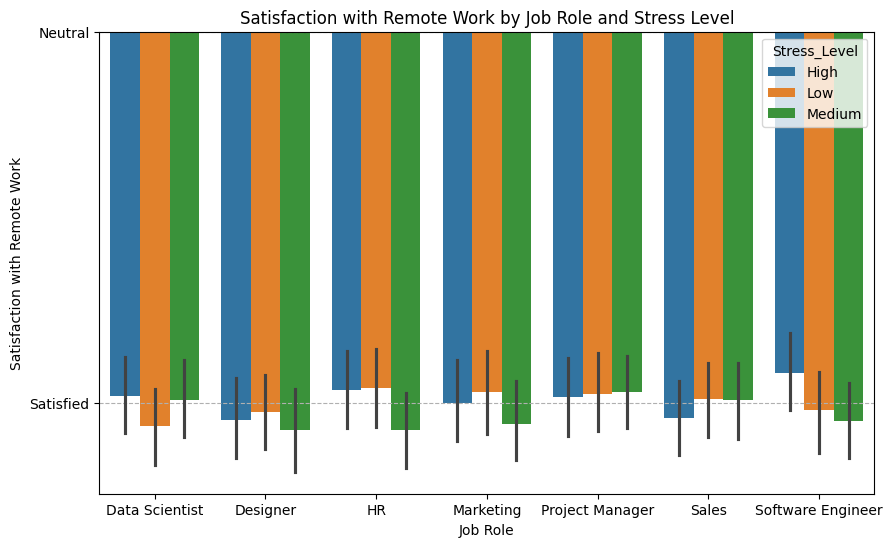

In [17]:
# Job Role, Stress Level, and Satisfaction with Remote Work
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Job_Role', y = 'Satisfaction_with_Remote_Work', hue = 'Stress_Level', data = df)
plt.xlabel('Job Role')
plt.ylabel('Satisfaction with Remote Work')
plt.title('Satisfaction with Remote Work by Job Role and Stress Level')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

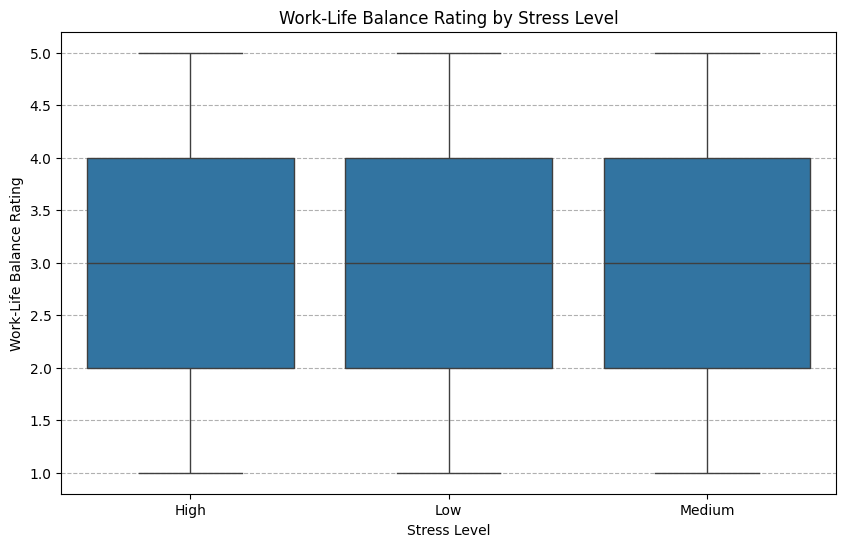

In [18]:
# Work-Life Balance Rating by Stress Level
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Stress_Level', y = 'Work_Life_Balance_Rating', data = df)
plt.xlabel('Stress Level')
plt.ylabel('Work-Life Balance Rating')
plt.title('Work-Life Balance Rating by Stress Level')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

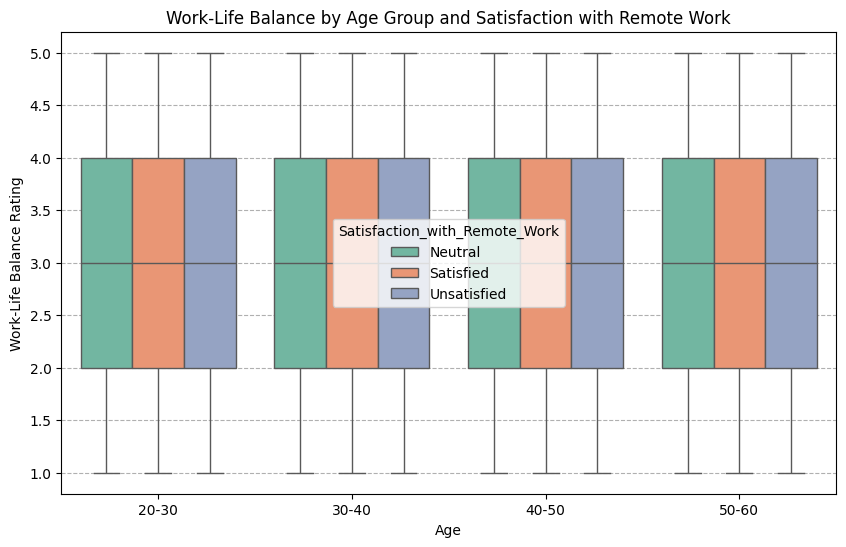

In [19]:
# Age Group, Work-Life Balance, and Remote Work Satisfaction
plt.figure(figsize = (10, 6))
sns.boxplot(x = pd.cut(df['Age'], bins = [20, 30, 40, 50, 60], labels = ['20-30', '30-40', '40-50', '50-60']), y = 'Work_Life_Balance_Rating', 
            hue = 'Satisfaction_with_Remote_Work', data = df, palette = 'Set2')
plt.xlabel('Age')
plt.ylabel('Work-Life Balance Rating')
plt.title('Work-Life Balance by Age Group and Satisfaction with Remote Work')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

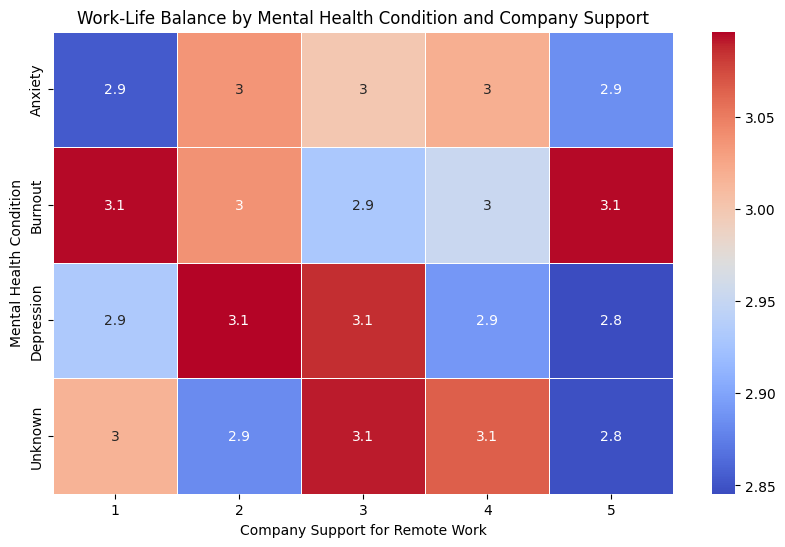

In [20]:
# Mental Health Condition, Company Support, and Work-Life Balance
mentalHealth_support_balance = df.pivot_table(index = 'Mental_Health_Condition', columns = 'Company_Support_for_Remote_Work', 
                                              values = 'Work_Life_Balance_Rating', aggfunc = 'mean', observed = False)
plt.figure(figsize = (10, 6))
sns.heatmap(mentalHealth_support_balance, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Work-Life Balance by Mental Health Condition and Company Support')
plt.xlabel('Company Support for Remote Work')
plt.ylabel('Mental Health Condition')
plt.show()

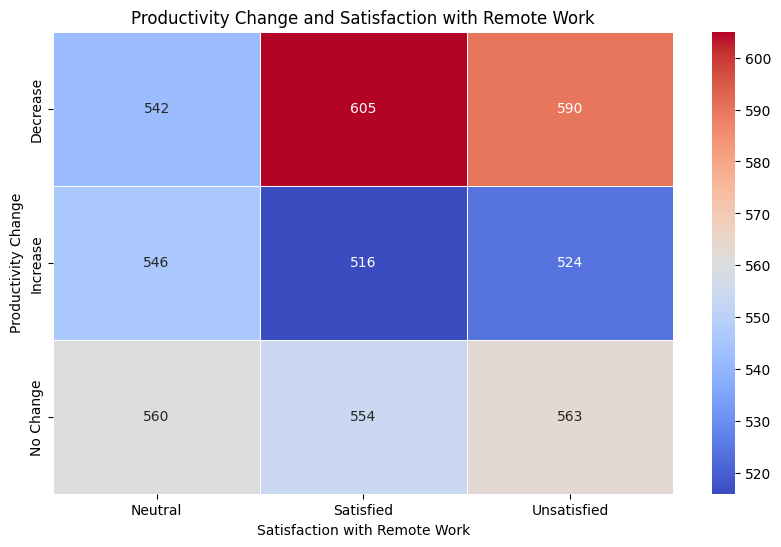

In [21]:
# Productivity Change and Satisfaction with Remote Work
productivity_satisfaction = df.pivot_table(index = 'Productivity_Change', columns = 'Satisfaction_with_Remote_Work', aggfunc = 'size',
                                           fill_value = 0, observed = False)
plt.figure(figsize = (10, 6))
sns.heatmap(productivity_satisfaction, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = 'd')
plt.title('Productivity Change and Satisfaction with Remote Work')
plt.xlabel("Satisfaction with Remote Work")
plt.ylabel("Productivity Change")
plt.show()

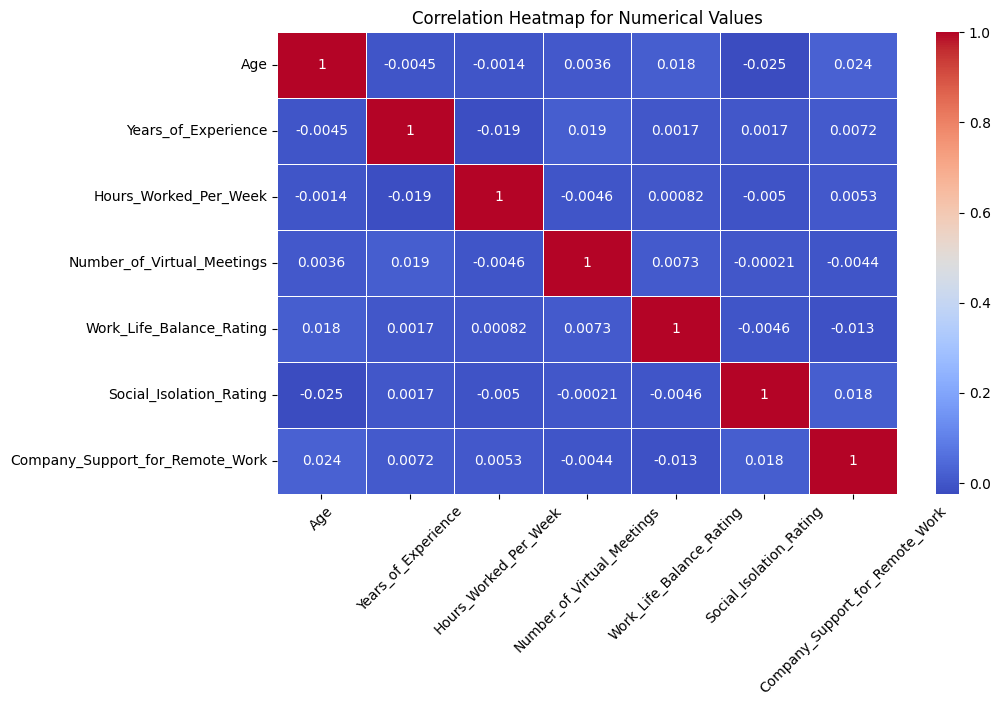

In [22]:
# Correlation Heatmap for Numerical Values
plt.figure(figsize = (10, 6))
numerical_df = df.select_dtypes(include = 'int64')
sns.heatmap(numerical_df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap for Numerical Values')
plt.xticks(rotation = 45)
plt.show()

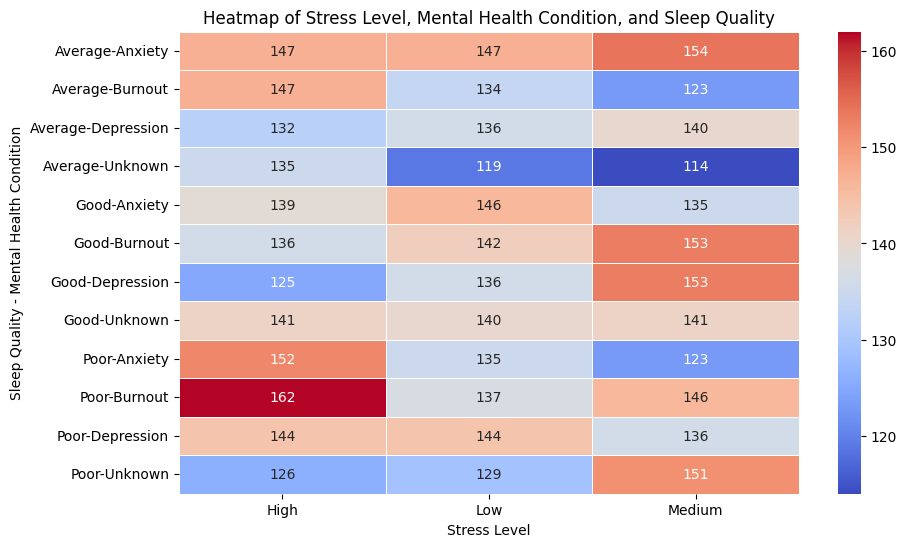

In [23]:
# Mental Health Condition, Sleep Quality, and Stress Level
heatmap_data_1 = df.groupby(['Sleep_Quality', 'Mental_Health_Condition', 'Stress_Level'], observed = False).size().unstack()
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data_1, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = 'd')
plt.title('Heatmap of Stress Level, Mental Health Condition, and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality - Mental Health Condition')
plt.show()

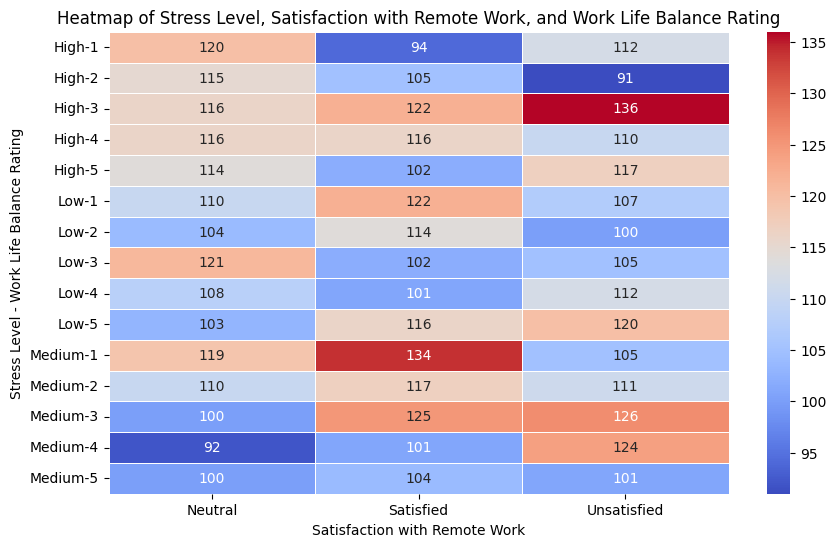

In [24]:
# Satisfaction with Stress Level, Satisfaction with Remote Work, and Work Life Balance Rating
heatmap_data_2 = df.groupby(['Stress_Level', 'Work_Life_Balance_Rating', 'Satisfaction_with_Remote_Work'], observed = False).size().unstack()
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data_2, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = 'd')
plt.title('Heatmap of Stress Level, Satisfaction with Remote Work, and Work Life Balance Rating')
plt.xlabel('Satisfaction with Remote Work')
plt.ylabel('Stress Level - Work Life Balance Rating')
plt.show()